In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['number_of_reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['number_of_reviews'].max()
Min = Mexico['number_of_reviews'].min()
Limites = [Min, Max]
Limites

[0.0, 271.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

271.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

17.272554072444922

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 271, 16)
intervalos

array([  0.        ,  18.06666667,  36.13333333,  54.2       ,
        72.26666667,  90.33333333, 108.4       , 126.46666667,
       144.53333333, 162.6       , 180.66666667, 198.73333333,
       216.8       , 234.86666667, 252.93333333, 271.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['number_of_reviews'] = pd.cut ( x = Mexico ['number_of_reviews'], bins = intervalos, labels = categorias )
Mexico['number_of_reviews']

0               NaN
1        Categoria4
2        Categoria3
3        Categoria8
4        Categoria1
            ...    
26577           NaN
26578           NaN
26579           NaN
26580           NaN
26581           NaN
Name: number_of_reviews, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [12]:
table1 = freq_tbl(Mexico['number_of_reviews'])
table1

,number_of_reviews,frequency,percentage,cumulative_perc
0,Categoria1,10259,0.385938,0.447483
1,Categoria2,3598,0.135355,0.604423
2,Categoria3,2841,0.106877,0.728343
3,Categoria4,1609,0.060530,0.798526
4,Categoria5,1129,0.042472,0.847771
5,Categoria6,851,0.032014,0.884891
6,Categoria7,626,0.023550,0.912196
7,Categoria8,521,0.019600,0.934921
8,Categoria9,400,0.015048,0.952368
9,Categoria10,299,0.011248,0.965410


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,number_of_reviews,frequency
0,Categoria1,10259
1,Categoria2,3598
2,Categoria3,2841
3,Categoria4,1609
4,Categoria5,1129
5,Categoria6,851
6,Categoria7,626
7,Categoria8,521
8,Categoria9,400
9,Categoria10,299


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('number_of_reviews')
Filtro_index

,frequency
number_of_reviews,
Categoria1,10259
Categoria2,3598
Categoria3,2841
Categoria4,1609
Categoria5,1129
Categoria6,851
Categoria7,626
Categoria8,521
Categoria9,400


Text(0, 0.5, 'Frecuencia')

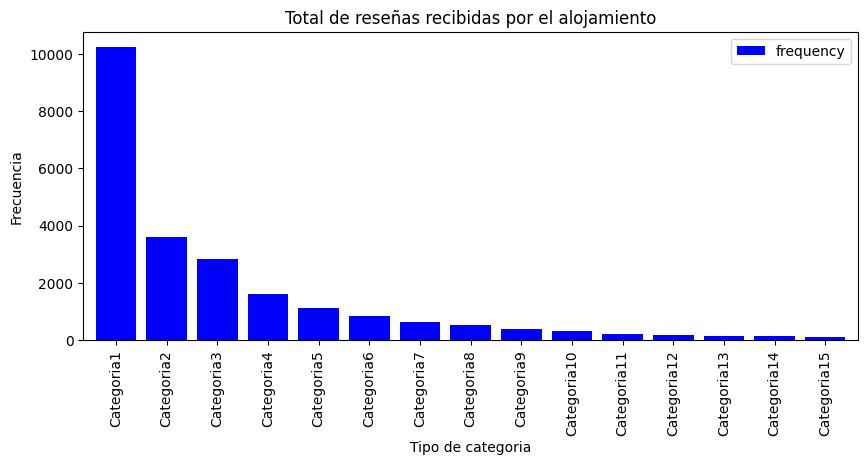

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Total de reseñas recibidas por el alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')